### Importing The Libraries

In [1]:
import numpy as np
import os
import time
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


import seaborn as sns

plt.style.use(style="seaborn")
%matplotlib inline

In [2]:
bajaj= pd.read_csv(r"C:\Users\omami\OneDrive\Desktop\Sem_2_ISI\Time series\Project\BAJAJFINSV(16-19).csv")

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\omami\\OneDrive\\Desktop\\Sem_2_ISI\\Time series\\Project\\BAJAJFINSV(16-19).csv'

In [139]:
bajaj.head()

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,31-Oct-19,EQ,"8,120.00","8,241.95","8,100.00","8,082.40","8,130.00","8,134.35","8,179.30","8,668.80","5,241.00",423287,"3,46,21,92,262.05",36910
1,30-Oct-19,EQ,"8,196.85","8,199.05","8,061.25","8,150.90","8,086.00","8,082.40","8,120.49","8,668.80","5,241.00",226406,"1,83,85,27,354.95",26805
2,29-Oct-19,EQ,"8,113.00","8,174.35","8,013.00","8,001.50","8,150.00","8,150.90","8,119.33","8,668.80","5,241.00",389923,"3,16,59,13,832.95",52616
3,27-Oct-19,EQ,"7,980.00","8,085.45","7,954.35","7,972.15","8,016.15","8,001.50","8,015.01","8,668.80","4,955.00",41755,"33,46,66,929.00",5011
4,25-Oct-19,EQ,"8,141.00","8,160.00","7,852.00","8,091.00","7,978.00","7,972.15","8,011.76","8,668.80","4,955.00",354844,"2,84,29,25,239.50",40102


In [140]:
bajaj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           945 non-null    object
 1   series         945 non-null    object
 2   OPEN           945 non-null    object
 3   HIGH           945 non-null    object
 4   LOW            945 non-null    object
 5   PREV. CLOSE    945 non-null    object
 6   ltp            945 non-null    object
 7   close          945 non-null    object
 8   vwap           945 non-null    object
 9   52W H          945 non-null    object
 10  52W L          945 non-null    object
 11  VOLUME         945 non-null    int64 
 12  VALUE          945 non-null    object
 13  No of trades   945 non-null    int64 
dtypes: int64(2), object(12)
memory usage: 103.5+ KB


In [141]:
bajaj=bajaj[["Date ","close "]]

In [142]:
list(bajaj.columns)

['Date ', 'close ']

In [143]:
## for sake of simplicity in data there is one extraspace anfter each column name we will remname that.

In [144]:
bajaj=bajaj.rename(columns={"Date " :"Date","close ":"close"})

In [145]:
list(bajaj.columns)

['Date', 'close']

In [146]:

## we will select rows which are important and contribute in analysis and drop others

In [147]:
bajaj.tail(3)

,Date,close
942,05-Jan-16,"1,946.00"
943,04-Jan-16,"1,959.50"
944,01-Jan-16,"1,983.80"


In [148]:
## for time series analysis we will see trend date and close price

In [149]:
## converting Date in date time format
bajaj['Date'] = pd.to_datetime(bajaj['Date'])

In [150]:
## sorting the data by its date 
bajaj=bajaj.sort_values(by='Date')
## seting index as date
bajaj=bajaj.set_index('Date',drop=True)

In [151]:
bajaj["close"]

Date
2016-01-01    1,983.80
2016-01-04    1,959.50
2016-01-05    1,946.00
2016-01-06    1,938.55
2016-01-07    1,927.05
                ...   
2019-10-25    7,972.15
2019-10-27    8,001.50
2019-10-29    8,150.90
2019-10-30    8,082.40
2019-10-31    8,134.35
Name: close, Length: 945, dtype: object

In [152]:
bajaj["close"]=bajaj["close"].str.replace(",","")
bajaj["close"]=pd.to_numeric(bajaj["close"])

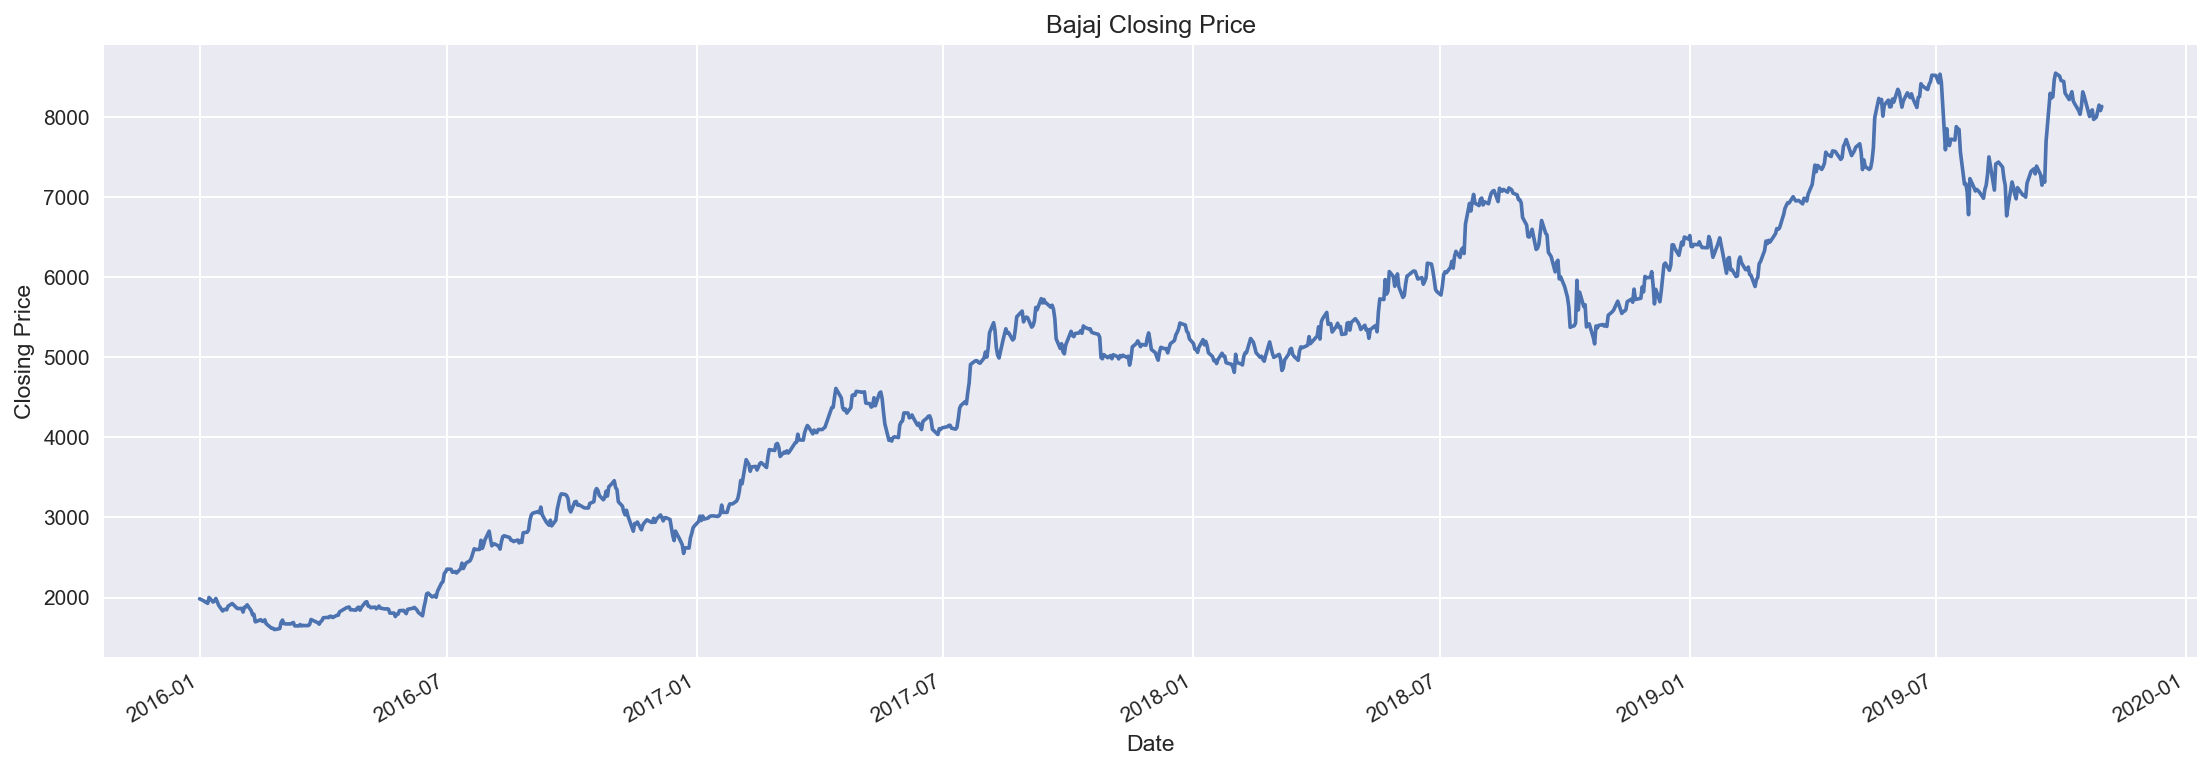

In [153]:
plt.figure(figsize=(18,6), dpi=150)
bajaj["close"].plot()
plt.title("Bajaj Closing Price")
plt.ylabel("Closing Price")
plt.xlabel("Date")
plt.show()

In [154]:
df_16=bajaj.close[:247]
df_17=bajaj.close[247:495]
df_18=bajaj.close[495:741]
df_19=bajaj.close[741:945]


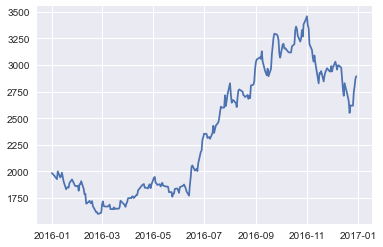

In [155]:
plt.plot(df_16)

<Figure size 432x288 with 0 Axes>

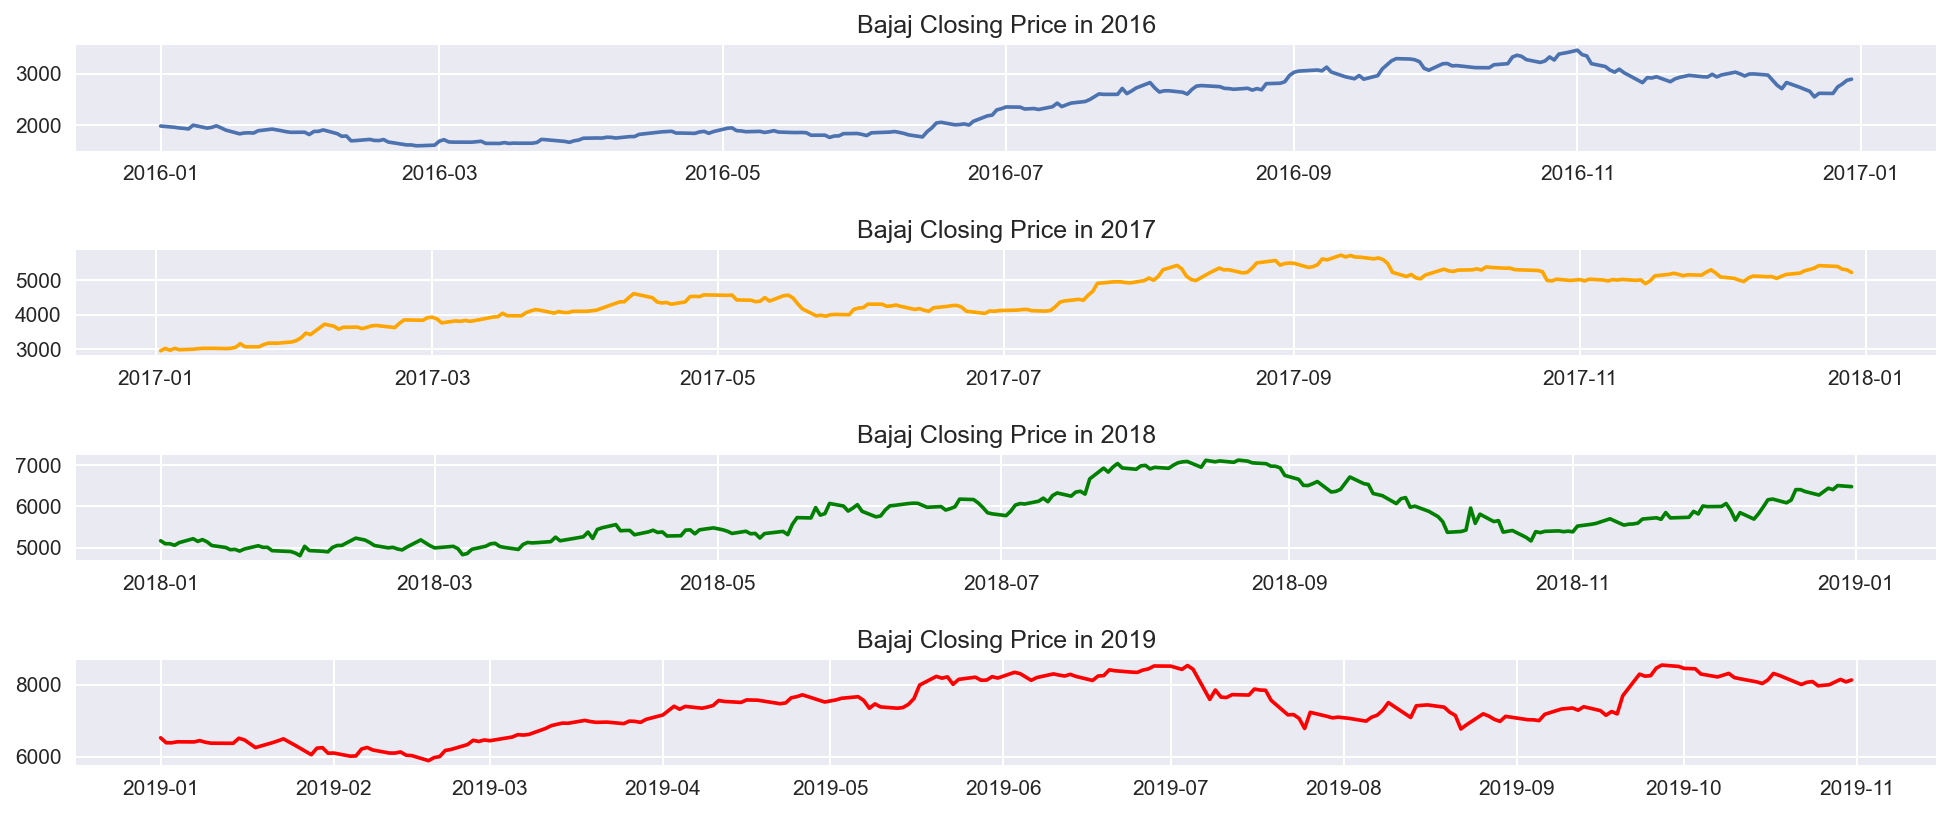

In [157]:
fig = plt.figure()
# fig.subplots_adjust(bottom=0.1, left=0.1, top = 0.9, right=.9)
plt.figure(figsize=(16,6), dpi=150)

plt.subplot(4, 1, 1)
plt.plot(df_16)
plt.title("Bajaj Closing Price in 2016")

#

plt.subplot(4, 1, 2)
plt.plot(df_17, color='orange')
plt.title("Bajaj Closing Price in 2017")

#

plt.subplot(4, 1, 3)
plt.plot(df_18,color='green')
plt.title("Bajaj Closing Price in 2018")

#

plt.subplot(4, 1, 4)
plt.plot(df_19,color="red")
plt.title("Bajaj Closing Price in 2019")



plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.95)
plt.show()

In [158]:
df_16.describe()

count     247.000000
mean     2366.503644
std       577.941623
min      1600.350000
25%      1846.575000
50%      2314.650000
75%      2927.800000
max      3458.900000
Name: close, dtype: float64

<AxesSubplot:>

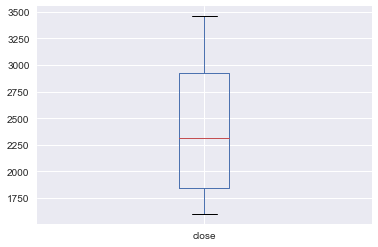

In [159]:
df_16.plot.box()

<Figure size 432x288 with 0 Axes>

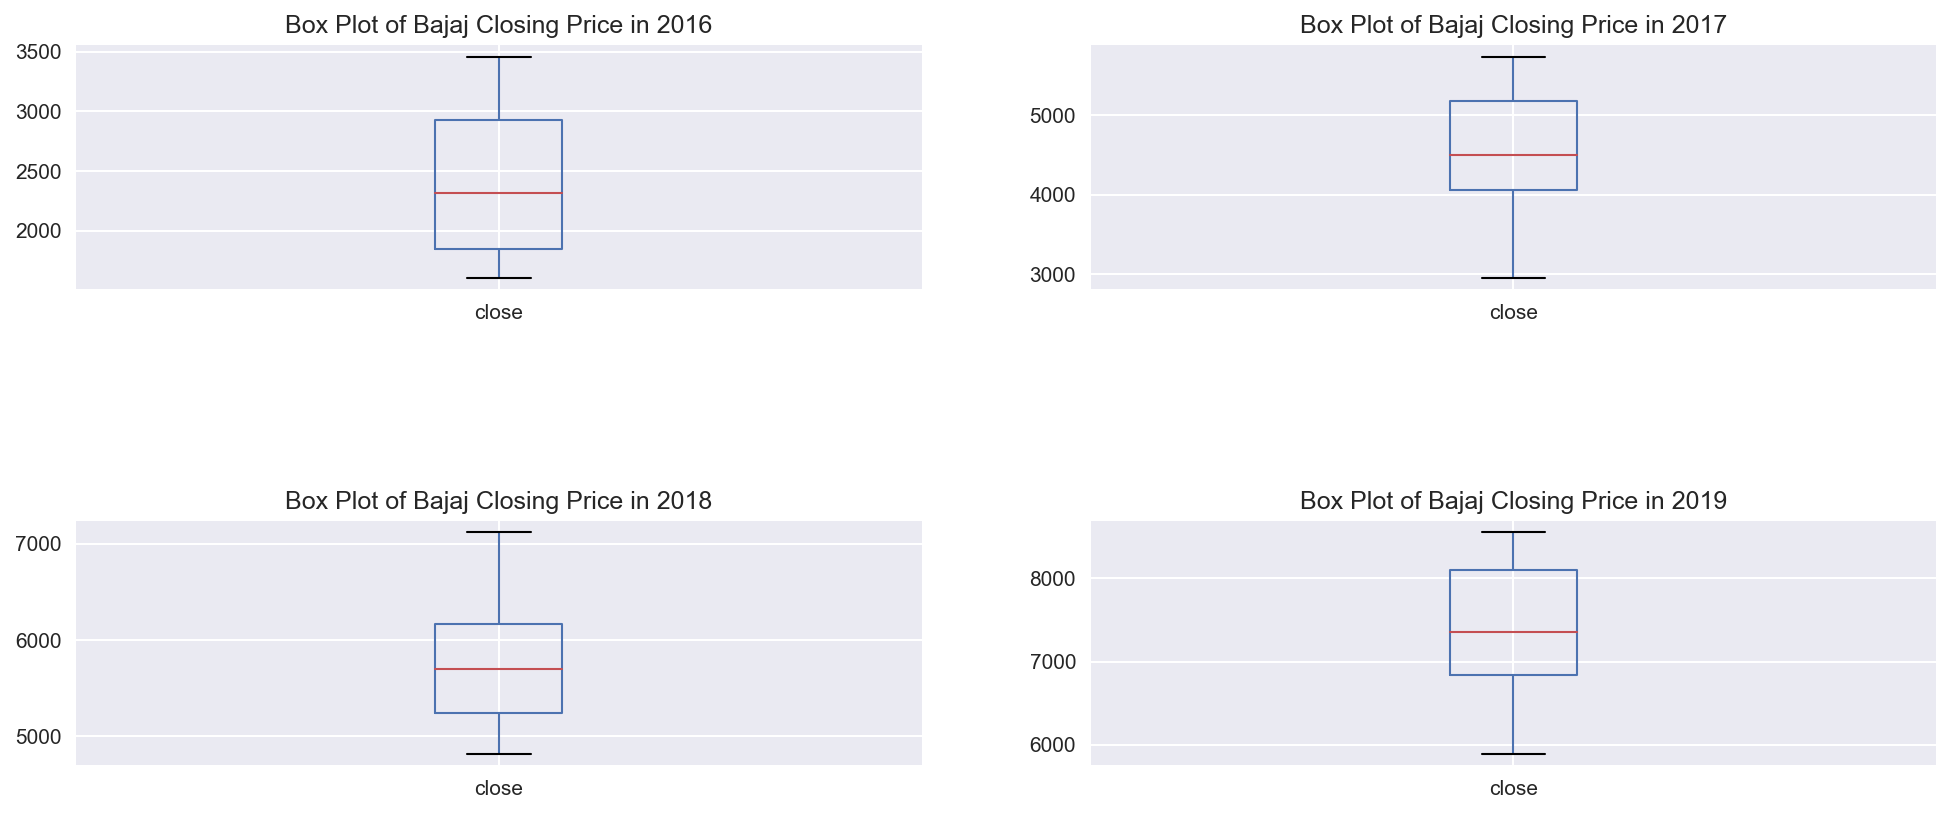

In [160]:
fig = plt.figure()
# fig.subplots_adjust(bottom=0.1, left=0.1, top = 0.9, right=.9)
plt.figure(figsize=(16,6), dpi=150)

plt.subplot(2, 2, 1)
df_16.plot.box()
plt.title("Box Plot of Bajaj Closing Price in 2016")

#

plt.subplot(2, 2, 2)
df_17.plot.box()
plt.title("Box Plot of Bajaj Closing Price in 2017")

#

plt.subplot(2, 2, 3)
df_18.plot.box()
plt.title("Box Plot of Bajaj Closing Price in 2018")

#

plt.subplot(2, 2,4)
df_19.plot.box()
plt.title("Box Plot of Bajaj Closing Price in 2019")



plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.95)
plt.show()

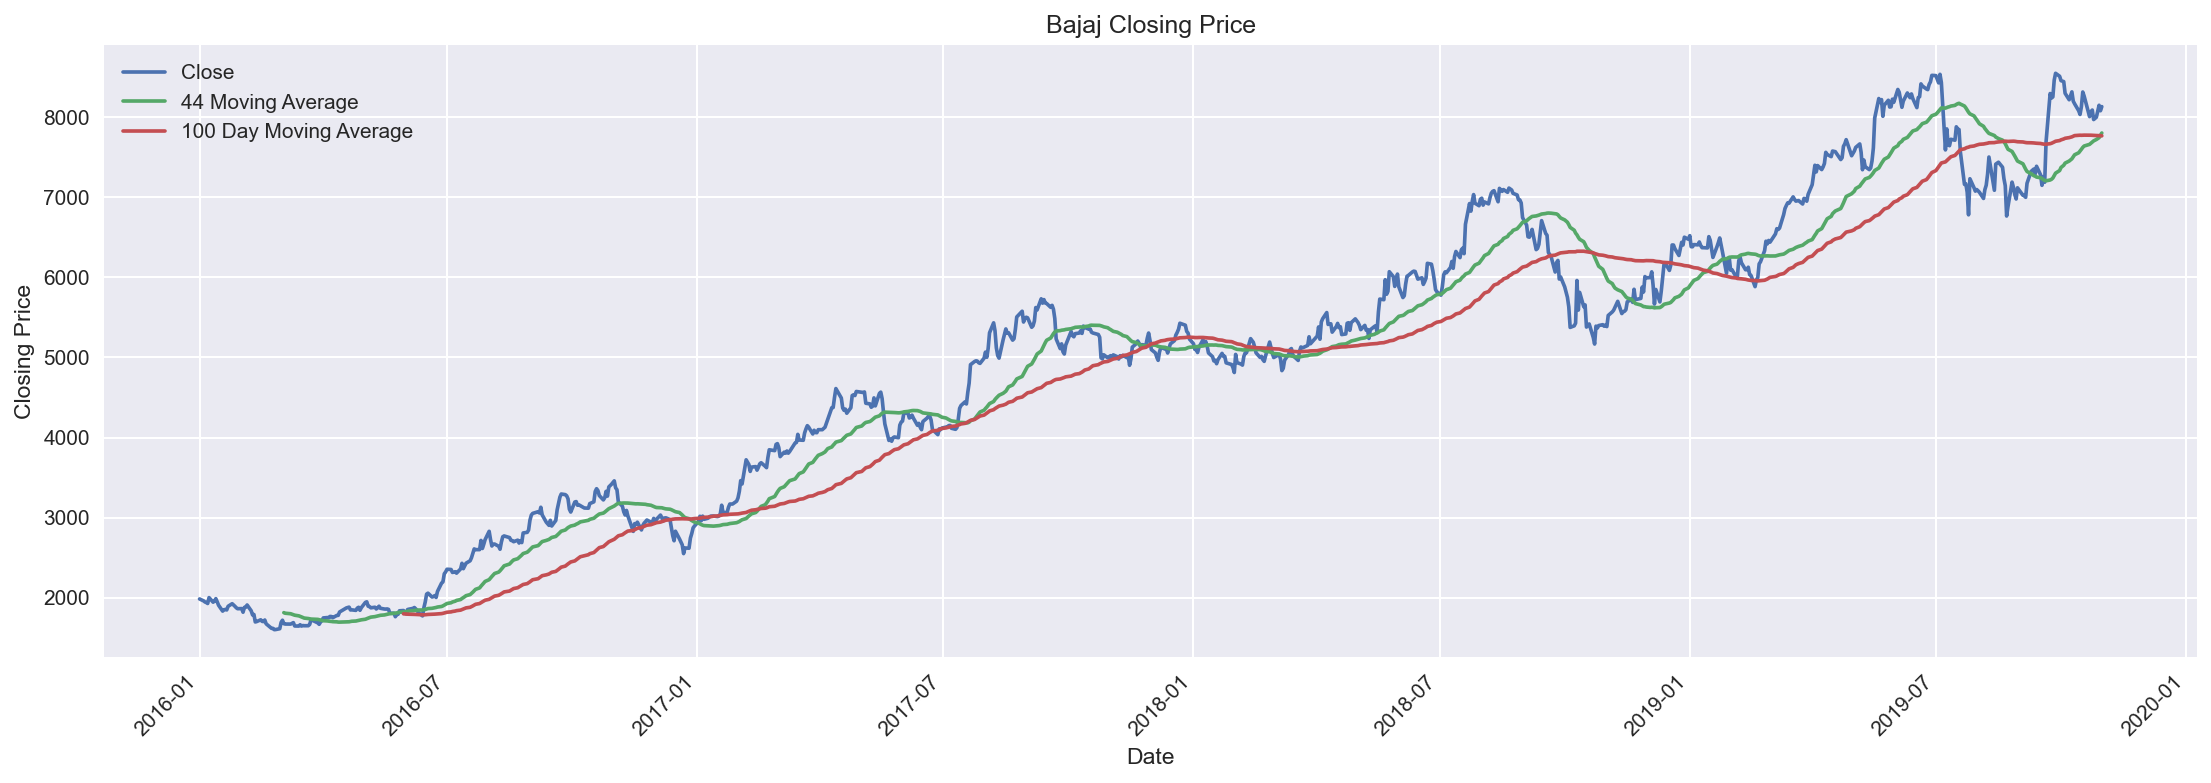

In [161]:
plt.figure(figsize=(18,6), dpi=150)
bajaj["close"].plot()
bajaj["close"].rolling(window=44).mean().plot()
bajaj["close"].rolling(window=100).mean().plot()
plt.legend(("Close","44 Moving Average","100 Day Moving Average"),loc = 'upper left')

plt.xticks(rotation=45)
plt.title("Bajaj Closing Price")
plt.ylabel("Closing Price")
plt.xlabel("Date")
plt.savefig("Tata_Steel")
plt.show()

#### data frame in univeriante

In [162]:
df1=bajaj["close"]

In [163]:
n=int(len(df1)*0.85)
df=df1[:n]
test=df1[n:]

In [164]:
df_16.describe()

count     247.000000
mean     2366.503644
std       577.941623
min      1600.350000
25%      1846.575000
50%      2314.650000
75%      2927.800000
max      3458.900000
Name: close, dtype: float64

In [165]:
df_17.describe()

count     248.000000
mean     4527.690323
std       736.724612
min      2949.650000
25%      4059.812500
50%      4499.375000
75%      5170.387500
max      5733.300000
Name: close, dtype: float64

In [166]:
df_18.describe()

count     246.000000
mean     5774.300203
std       633.346199
min      4812.350000
25%      5241.012500
50%      5698.525000
75%      6164.087500
max      7116.600000
Name: close, dtype: float64

In [167]:
df_19.describe()

count     204.000000
mean     7346.260784
std       751.189480
min      5885.150000
25%      6841.575000
50%      7350.775000
75%      8098.575000
max      8550.350000
Name: close, dtype: float64

### Checking stationary by Agumented Dickey -fuller test
#### Null Hypothesis: series is non stationary and Alternativve : it is stationary

In [168]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(df.dropna())
print(f"ADF Statistic : {result[0]}")
print(f"p-value : {result[1]}")


ADF Statistic : -0.8843695628179105
p-value : 0.7930761571102731


###  p value is higher than significance level we are fail to reject null hypothesis
### which implies data is non- stationary

###  Non Stationary 

In [169]:
from statsmodels.graphics.tsaplots import plot_acf

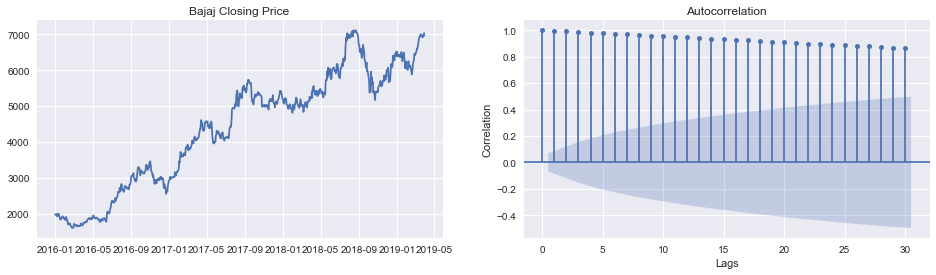

In [170]:
fig, (ax1,ax2)= plt.subplots(1,2, figsize=(16,4))
ax1.plot(df)
ax1.set_title(("Bajaj Closing Price"))
plt.title("Bajaj Closing Price")
plt.ylabel("Correlation")
plt.xlabel("Lags")
plot_acf(df,ax=ax2,);

####  Takining first differencing 

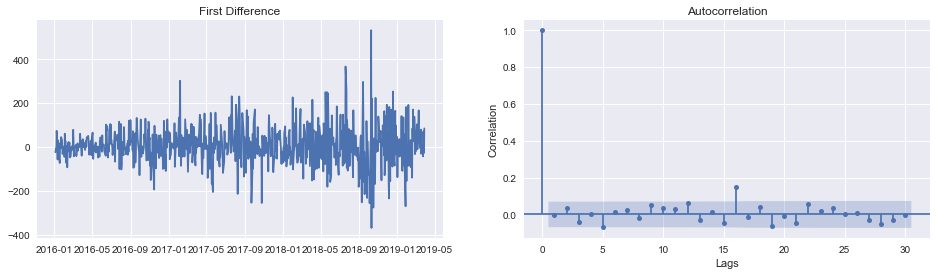

In [171]:
diff=df.diff().dropna()
fig, (ax1,ax2)= plt.subplots(1,2, figsize=(16,4))

ax1.plot(diff)
ax1.set_title(("First Difference"))

## add ;

plot_acf(diff,ax=ax2)
plt.xlabel("Lags")
plt.ylabel("Correlation");

In [172]:
diff.describe()

count    802.000000
mean       6.300810
std       85.165342
min     -369.500000
25%      -38.912500
50%        4.875000
75%       47.187500
max      532.400000
Name: close, dtype: float64

####  After first diffrence we can see there is no trend and it is starinary

In [173]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(diff.dropna())
print(f"ADF Statistic : {result[0]}")
print(f"p-value : {result[1]}")

ADF Statistic : -5.665963899725987
p-value : 9.150586727802895e-07


### stoping criteria likhna h
####  Autocorrelation goes far negative we choose I as 1

###  we can use the pmdarima package to get the number of differencing 

In [174]:
from pmdarima.arima.utils import ndiffs

In [175]:
ndiffs(df,test="adf")

1

In [176]:

from statsmodels.graphics.tsaplots import plot_pacf

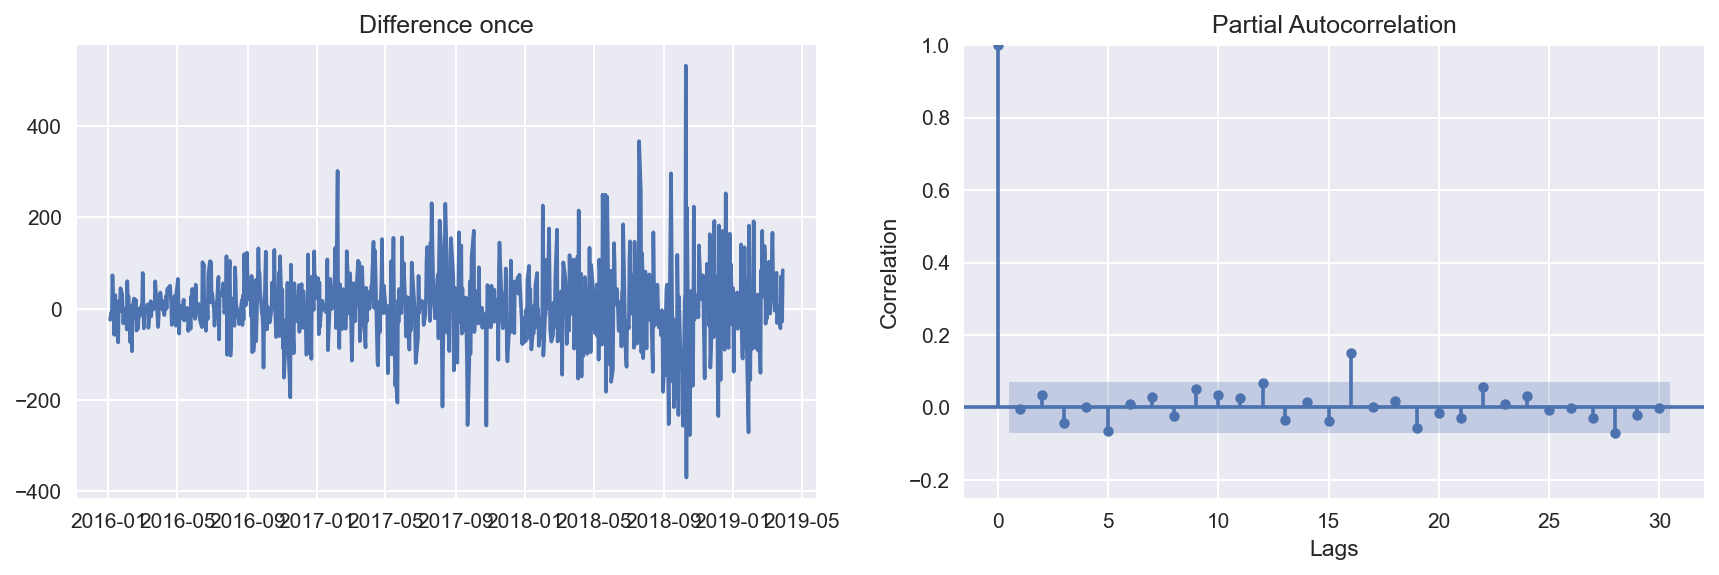

In [177]:
diff=df.diff().dropna()
fig, (ax1,ax2)= plt.subplots(1,2, figsize=(14,4),dpi=150)

ax1.plot(diff)
ax1.set_title(("Difference once"))
ax2.set_ylim(-0.25,1)

plot_pacf(diff,ax=ax2)
plt.xlabel("Lags")
plt.ylabel("Correlation");

###  Take p as2

#### find Q

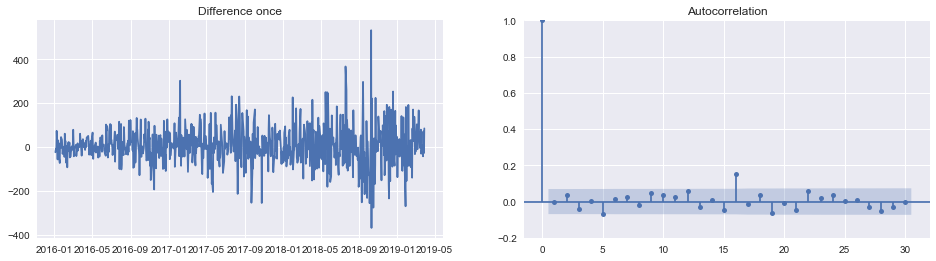

In [178]:
diff=df.diff().dropna()
fig, (ax1,ax2)= plt.subplots(1,2, figsize=(16,4))

ax1.plot(diff)
ax1.set_title(("Difference once"))
ax2.set_ylim(-0.2,1)


plot_acf(diff,ax=ax2);

###  Fitting the arima model

In [179]:
from statsmodels.tsa.arima_model import ARIMA

####  ARIMA (1,1,1)

In [180]:
model=ARIMA(df,order=(1,1,1))
result=model.fit(disp=0)
import warnings
warnings.filterwarnings('ignore')

C:\Users\omami\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\omami\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [181]:
print(result.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.close   No. Observations:                  802
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4699.843
Method:                       css-mle   S.D. of innovations             84.876
Date:                Fri, 17 Jun 2022   AIC                           9407.685
Time:                        17:21:03   BIC                           9426.433
Sample:                             1   HQIC                          9414.886
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             6.3005      2.962      2.127      0.033       0.495      12.106
ar.L1.D.close    -0.9509      0.031    -30.806      0.000      -1.011      -0.890
ma.L1.D.close     0.9281      0.036     

In [182]:
model=ARIMA(df,order=(1,1,2))
result=model.fit(disp=0)
print(result.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.close   No. Observations:                  802
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -4699.582
Method:                       css-mle   S.D. of innovations             84.848
Date:                Fri, 17 Jun 2022   AIC                           9409.163
Time:                        17:21:07   BIC                           9432.599
Sample:                             1   HQIC                          9418.165
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             6.3018      3.036      2.076      0.038       0.351      12.252
ar.L1.D.close    -0.9489      0.032    -29.746      0.000      -1.011      -0.886
ma.L1.D.close     0.9496      0.047     

In [183]:
model=ARIMA(df,order=(2,1,1))
result=model.fit(disp=0)
print(result.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.close   No. Observations:                  802
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -4699.579
Method:                       css-mle   S.D. of innovations             84.848
Date:                Fri, 17 Jun 2022   AIC                           9409.157
Time:                        17:21:12   BIC                           9432.593
Sample:                             1   HQIC                          9418.159
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             6.3015      3.039      2.074      0.038       0.345      12.258
ar.L1.D.close    -0.9213      0.052    -17.718      0.000      -1.023      -0.819
ar.L2.D.close     0.0262      0.036     

In [184]:
model=ARIMA(df,order=(2,1,2))
result=model.fit(disp=0)
print(result.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.close   No. Observations:                  802
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -4699.576
Method:                       css-mle   S.D. of innovations             84.847
Date:                Fri, 17 Jun 2022   AIC                           9411.151
Time:                        17:21:14   BIC                           9439.274
Sample:                             1   HQIC                          9421.953
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             6.3022      3.045      2.070      0.038       0.334      12.270
ar.L1.D.close    -0.8554      0.806     -1.061      0.289      -2.435       0.724
ar.L2.D.close     0.0889      0.766     

In [185]:
## ARIMA (1,1,2)= AIC(6020)

In [192]:
model=ARIMA(df,order=(16,1,6))
result=model.fit(disp=0)
print(result.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.close   No. Observations:                  802
Model:                ARIMA(16, 1, 6)   Log Likelihood               -4681.371
Method:                       css-mle   S.D. of innovations             82.907
Date:                Fri, 17 Jun 2022   AIC                           9410.741
Time:                        17:24:45   BIC                           9523.232
Sample:                             1   HQIC                          9453.950
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              6.2975      3.424      1.839      0.066      -0.413      13.008
ar.L1.D.close      0.2451      0.280      0.874      0.382      -0.304       0.795
ar.L2.D.close      0.0843      0.346

In [193]:
model=ARIMA(df,order=(6,1,16))
result=model.fit(disp=0)
print(result.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.close   No. Observations:                  802
Model:                ARIMA(6, 1, 16)   Log Likelihood               -4679.485
Method:                       css-mle   S.D. of innovations             82.682
Date:                Fri, 17 Jun 2022   AIC                           9406.969
Time:                        17:32:19   BIC                           9519.460
Sample:                             1   HQIC                          9450.178
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              6.2874      3.347      1.879      0.060      -0.272      12.847
ar.L1.D.close      0.0070      0.297      0.024      0.981      -0.575       0.588
ar.L2.D.close     -0.0637      0.315

In [188]:
## AIC(3,1,3)= AIC=6015

In [195]:
model=ARIMA(df,order=(16,1,16))
result=model.fit(disp=0)
print(result.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.close   No. Observations:                  802
Model:               ARIMA(16, 1, 16)   Log Likelihood               -4666.949
Method:                       css-mle   S.D. of innovations             80.510
Date:                Fri, 17 Jun 2022   AIC                           9401.898
Time:                        18:15:15   BIC                           9561.259
Sample:                             1   HQIC                          9463.110
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              6.3234      3.422      1.848      0.065      -0.384      13.031
ar.L1.D.close      0.5176      0.116      4.475      0.000       0.291       0.744
ar.L2.D.close     -0.4000      0.102

####  We will select ARIMA(16,1,16) with lowest AIC =(9401.898)

Text(0, 0.5, 'Frequency')

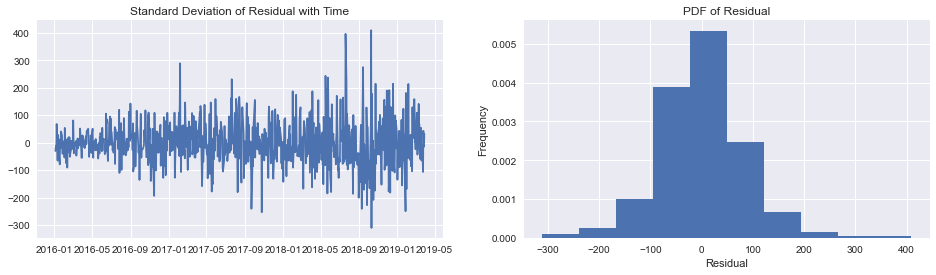

In [196]:
#plot residual
residuals=pd.DataFrame(result.resid)
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(16,4))
ax1.plot(residuals)
ax2.hist(residuals,density=True)
ax2.set_title("PDF of Residual")
ax1.set_title("Standard Deviation of Residual with Time")
plt.xlabel("Residual")
plt.ylabel("Frequency")

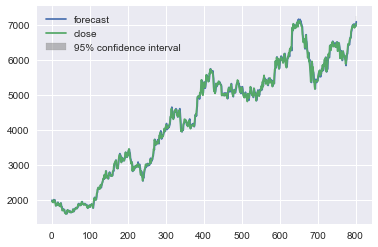

In [197]:

l_train=(len(df))
step=(len(test))
result.plot_predict(
    start=1,
    end=l_train,
    dynamic=False
    
);

In [198]:
l_train=(len(df))
step=(len(test))

In [199]:
#actual vs fitted
y_hat=result.predict(
    start=1,
    end=l_train,
    dynamic=False
);

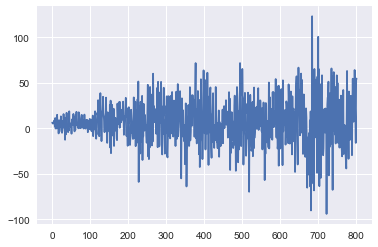

In [200]:
plt.plot(y_hat)

In [201]:
fc,se,conf=result.forecast(step)

In [202]:
fc=pd.Series(fc,index=test[:step].index)
lower=pd.Series(conf[:,0],index=test[:].index)
upper=pd.Series(conf[:,1],index=test[:].index)

In [203]:
fc

Date
2019-04-01    7091.828011
2019-04-02    7134.006811
2019-04-03    7155.473566
2019-04-04    7169.526864
2019-04-05    7155.758094
                 ...     
2019-10-25    7868.887976
2019-10-27    7872.683936
2019-10-29    7881.130045
2019-10-30    7890.272967
2019-10-31    7889.985576
Length: 142, dtype: float64

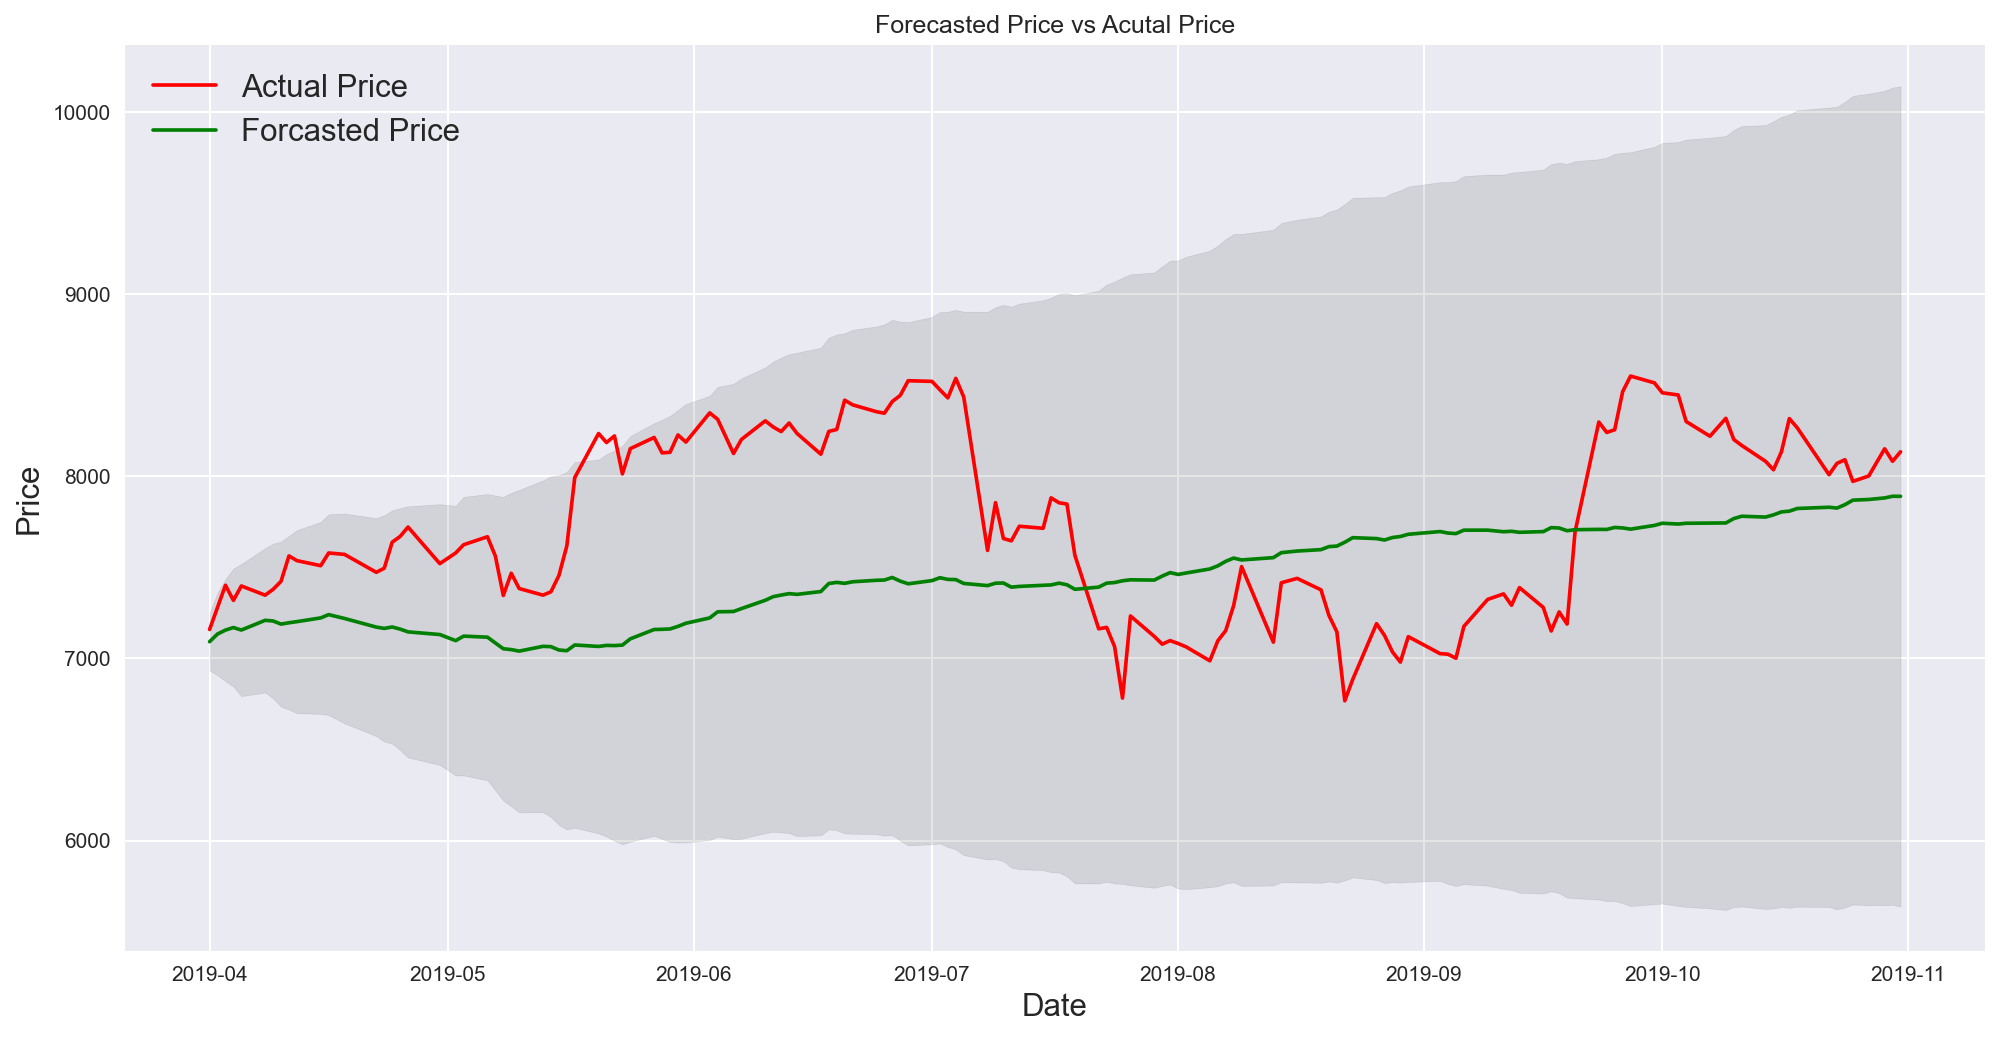

In [204]:
plt.figure(figsize=(16,8),dpi=150)

plt.plot(test[:step],label="Actual Price",color="red")
plt.plot(fc,label="Forcasted Price",color="green")
plt.fill_between(lower.index,lower,upper,color="k",alpha=0.1)
plt.title("Forecasted Price vs Acutal Price")
plt.xlabel("Date",fontsize=15)
plt.ylabel("Price",fontsize=15)
plt.legend(loc="upper left", fontsize=15)
plt.show()

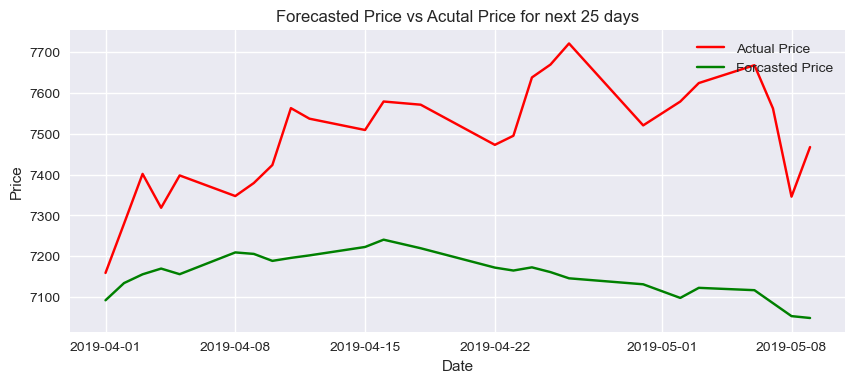

In [205]:
plt.figure(figsize=(10,4),dpi=100)
plt.plot(test[:25],label="Actual Price",color="red")
plt.plot(fc[:25],label="Forcasted Price",color="green")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend(loc="upper right", fontsize=10)
plt.title("Forecasted Price vs Acutal Price for next 25 days")
plt.show()



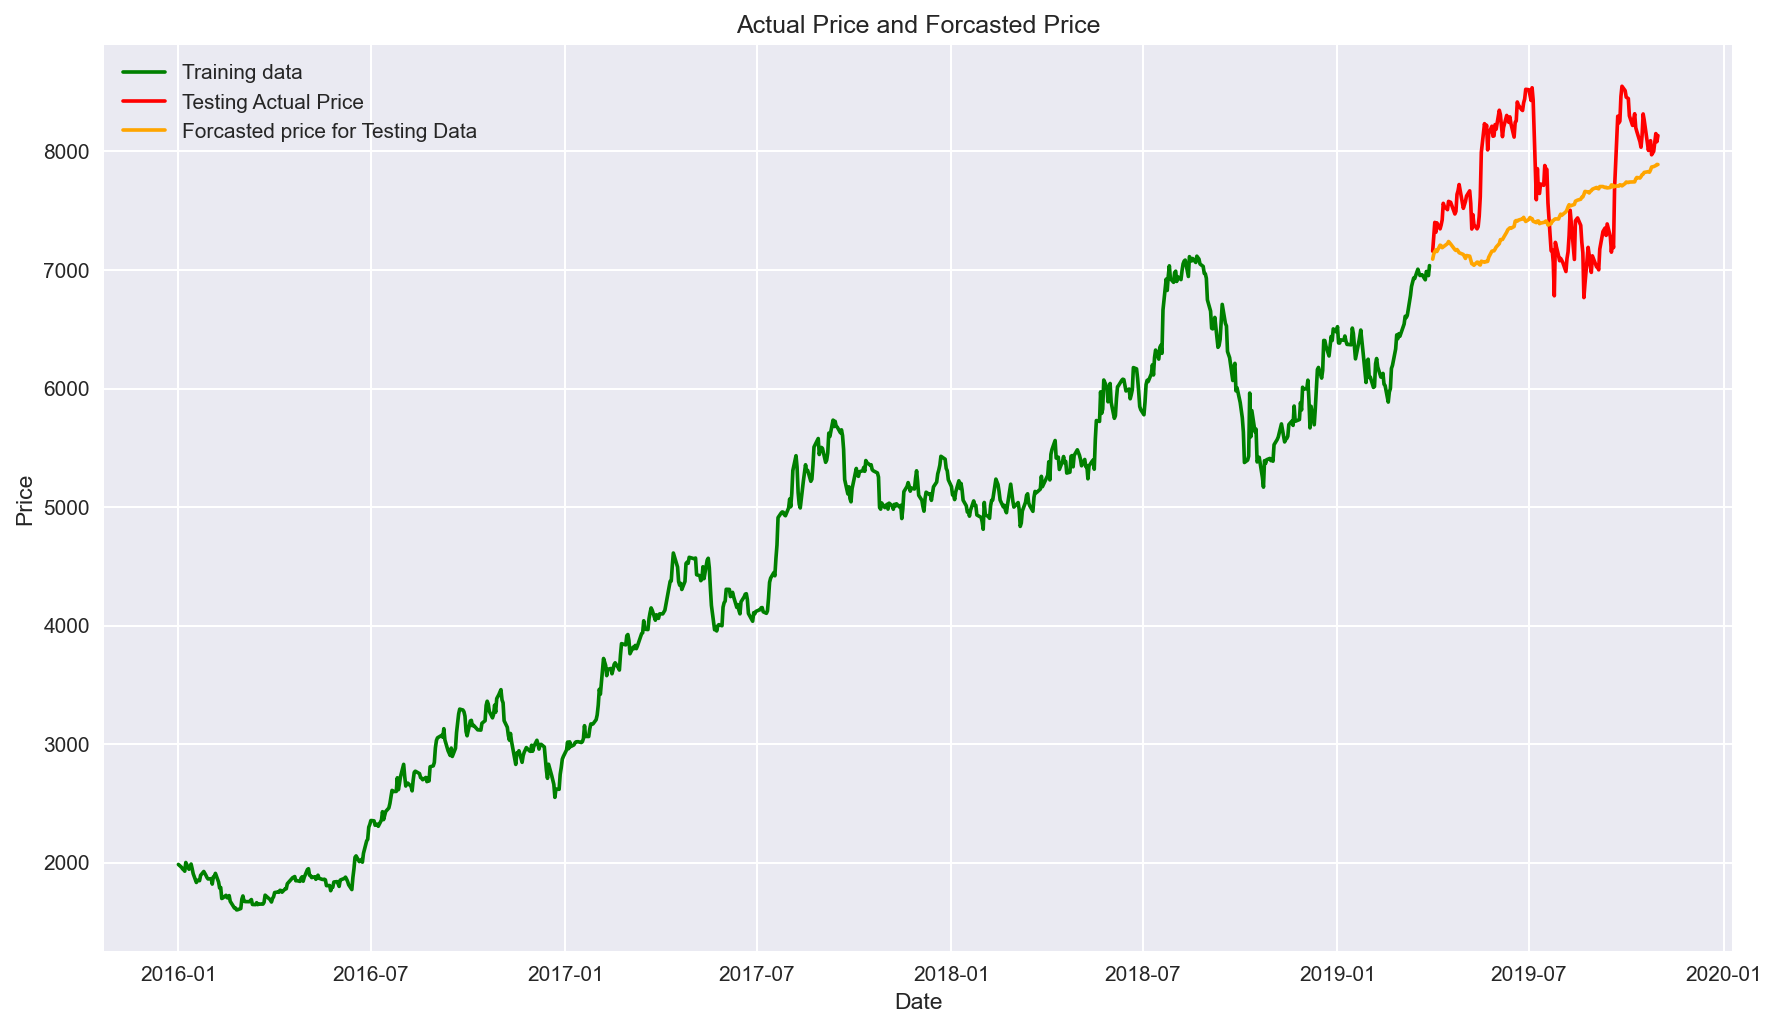

In [206]:
plt.figure(figsize=(14,8),dpi=150)
plt.plot(df,color="green",label="Training data")
plt.plot(test,color="red",label="Testing Actual Price")
plt.plot(fc,color="orange",label="Forcasted price for Testing Data")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Actual Price and Forcasted Price")
plt.legend(loc="upper left", fontsize=10)
;
plt.show()

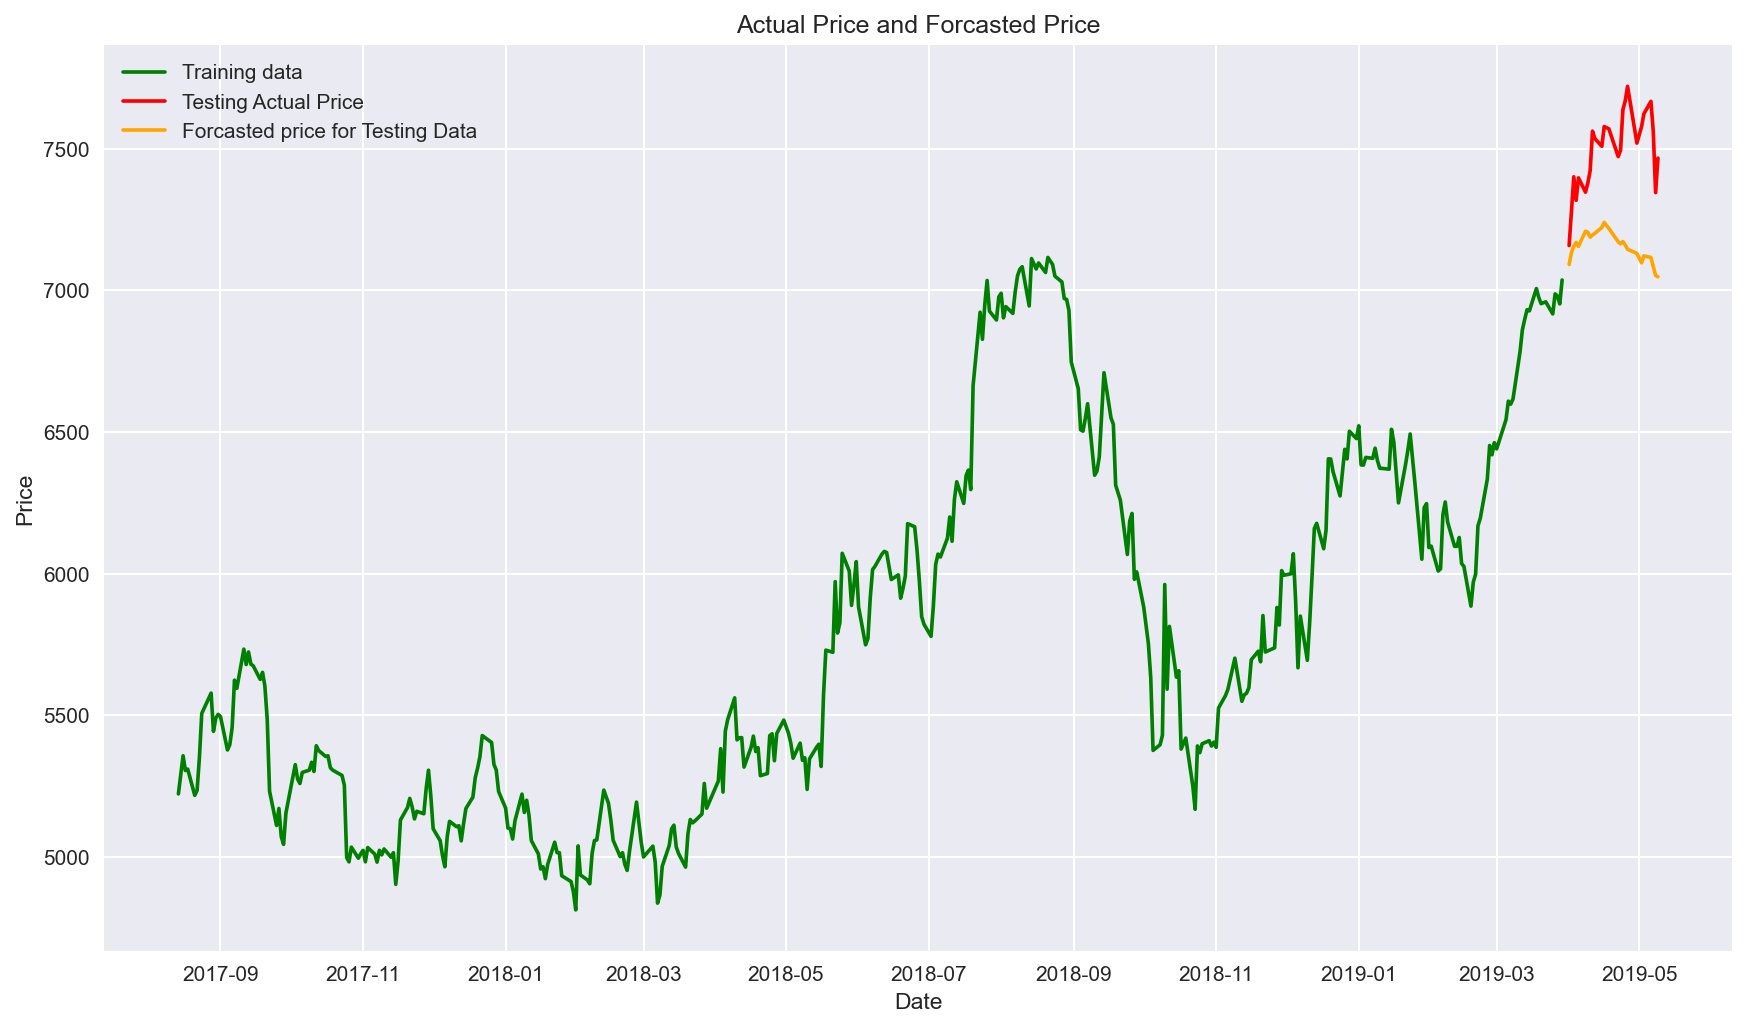

In [208]:
plt.figure(figsize=(14,8),dpi=150)
plt.plot(df[400:],color="green",label="Training data")
plt.plot(test[:25],color="red",label="Testing Actual Price")
plt.plot(fc[:25],color="orange",label="Forcasted price for Testing Data")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Actual Price and Forcasted Price")
plt.legend(loc="upper left", fontsize=10)
;
plt.show()

In [209]:
start=1
end=len(df)
pred=result.predict(start=start,end=end,typ="levels")
print(pred)

0      1990.123447
1      1965.255679
2      1951.247145
3      1945.116671
4      1932.658599
          ...     
798    6944.868269
799    6996.470981
800    6964.339255
801    7005.556318
802    7091.828011
Length: 803, dtype: float64


In [210]:
#### Calculate RMSE performance matrics
import math
from sklearn.metrics import mean_squared_error
rmse_train=math.sqrt(mean_squared_error(df,pred))
rmse1=math.sqrt(mean_squared_error(test,fc))

In [211]:
rmse_train

25.539474784987476

In [212]:
rmse1

620.8054970696766

In [213]:
from sklearn.metrics import mean_absolute_error
MAPE_training= mean_absolute_error(df,pred)
MAPE_test=mean_absolute_error(test,fc)

In [214]:
print(MAPE_training)
print(MAPE_test)

19.29105975849337
541.8664549310348


#### LSTM

In [57]:
df=bajaj["close"]


NameError: name 'data_tata_steel' is not defined

In [58]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df).reshape(-1,1))

NameError: name 'df' is not defined

In [59]:
plt.plot(df1)

NameError: name 'df1' is not defined

In [60]:
# n=int(len(df1)*0.85)
# df=df1[:n]
# test=df1[n:]

In [61]:
df1

NameError: name 'df1' is not defined

In [62]:
df1.shape

NameError: name 'df1' is not defined

In [63]:
## spliting dataset into rain and test split converting to array of training and testing data
training_size=int(len(df1)*.85)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

NameError: name 'df1' is not defined

In [64]:
training_size,test_size

NameError: name 'training_size' is not defined

In [65]:
## convert an array of values into a data matrix
def create_dataset(dataset,time_step):
    dataX,dataY=[],[]
    for i in range (len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX),np.array(dataY)

In [66]:
## reshape into X=t,t+1,t+3 and Y=t+4
time_step=100
X_train,y_train=create_dataset(train_data,time_step)
X_test,y_test=create_dataset(test_data,time_step)

NameError: name 'train_data' is not defined

In [67]:
print(X_train.shape)

NameError: name 'X_train' is not defined

In [68]:
## reshape LSTM in 3 dimention
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

NameError: name 'X_train' is not defined

In [69]:
print(X_test.shape)
print(X_train.shape)
print(y_train.shape)
print(y_test.shape)


NameError: name 'X_test' is not defined

In [70]:
### creating LSTM model

In [71]:
#pip install tensorflow

In [72]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [73]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer="adam")

In [74]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [75]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64,verbose=1)

NameError: name 'X_train' is not defined

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

In [ ]:
X_train.shape

In [ ]:
## Prediction of matrix
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
train_predict.shape

In [ ]:
## transformation to original 
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
#### Calculate RMSE performance matrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

In [ ]:
y_train.shape

In [ ]:
## test dataRMSE
math.sqrt(mean_squared_error(y_test,test_predict))

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.figure(figsize=(16,8))
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
x=len(test_data)-100

In [ ]:
x_input=test_data[x:].reshape(1,-1)
x_input.shape

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
print(day_new.shape)
print(day_pred.shape)

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [ ]:
plt.plot(day_new)
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[training_size:])


In [ ]:
df3=scaler.inverse_transform(df3).tolist()

In [ ]:
Y_lstm=(df3[800:943])

In [ ]:
plt.figure(figsize=(20,12))
plt.plot(df3)


In [ ]:
xPred=fc

In [ ]:
bajaj.head()

In [939]:
fc_s = fc_arima[0].values

In [920]:
index=(range(800,942))

In [934]:
fc_a=pd.DataFrame(fc_s,index=index,columns=["col"])

In [941]:
y_train.shape

(702,)